In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [15]:
bank = pd.read_csv('bank.csv',delimiter=';')
bank.rename(columns={'y':'deposit'}, inplace=True)

In [16]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [17]:
bank.shape

(4521, 17)

In [18]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [19]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [20]:
bank.dtypes.value_counts()

object    10
int64      7
Name: count, dtype: int64

In [21]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  deposit    4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [22]:
bank.duplicated().sum()

0

In [23]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [24]:
cat_cols = bank.select_dtypes(include='object').columns
print(cat_cols)

num_cols = bank.select_dtypes(exclude='object').columns
print(num_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [25]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [26]:
bank.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


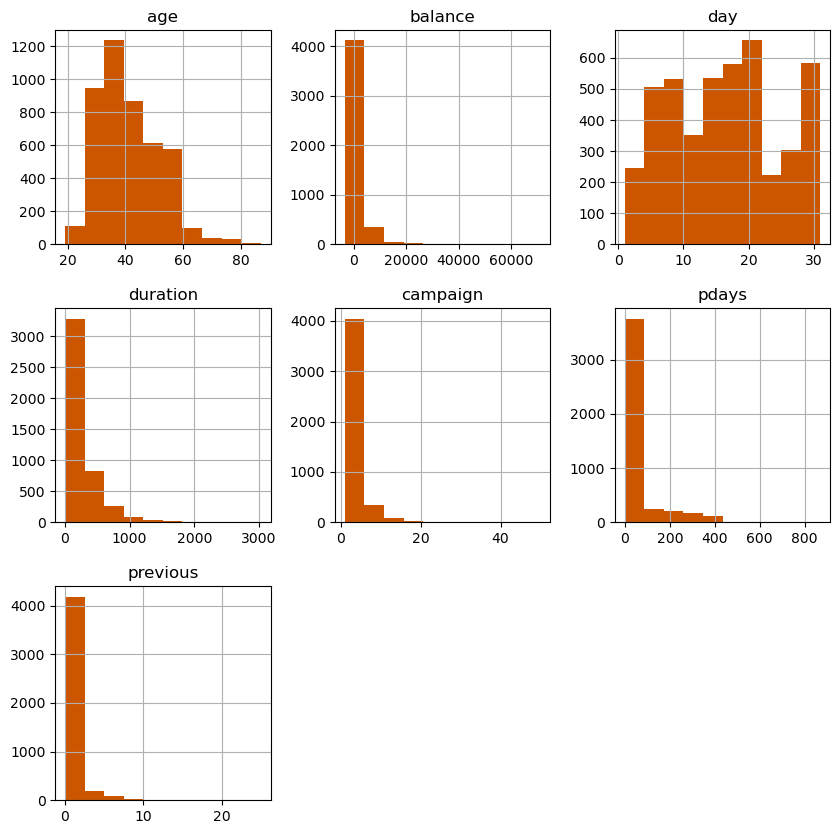

In [27]:
bank.hist(figsize=(10,10),color='#cc5500')
plt.show()

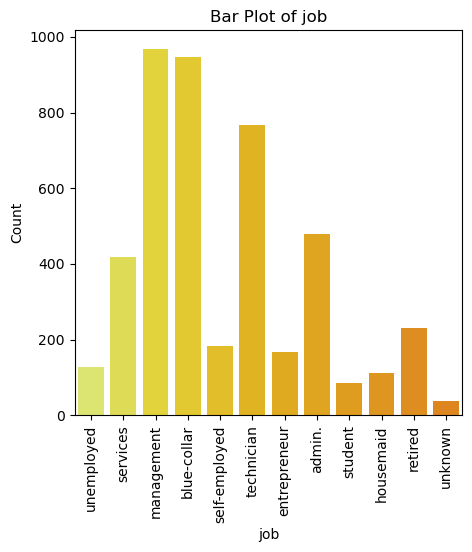

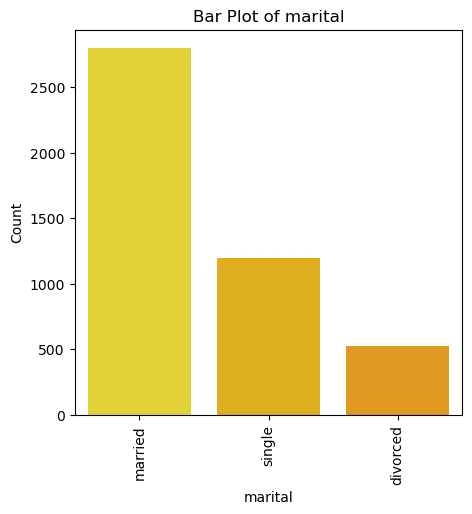

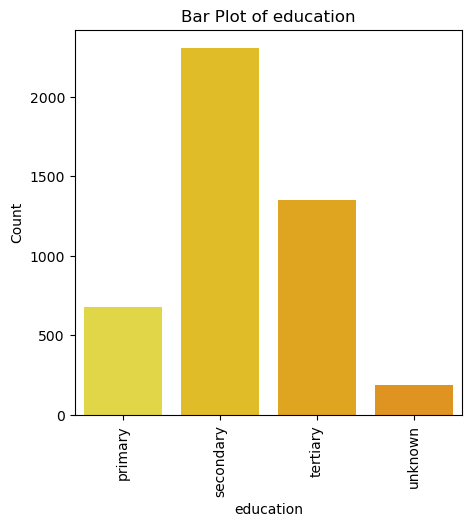

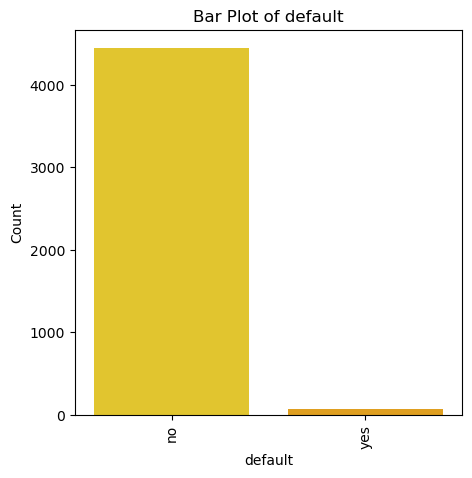

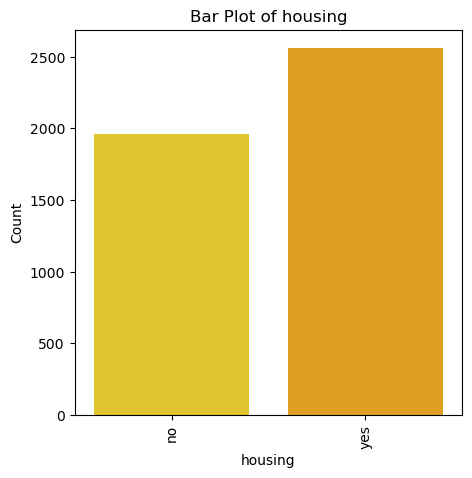

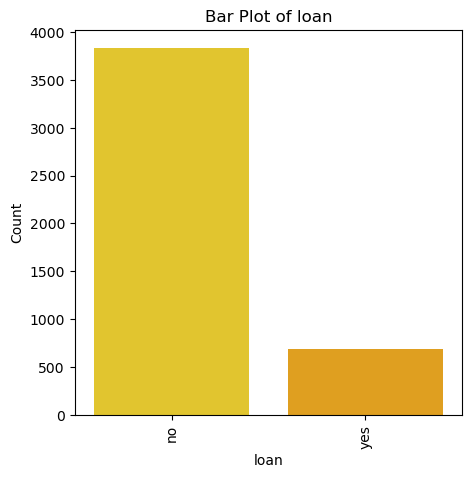

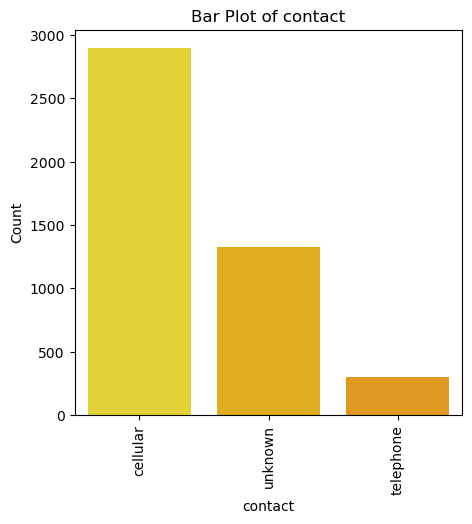

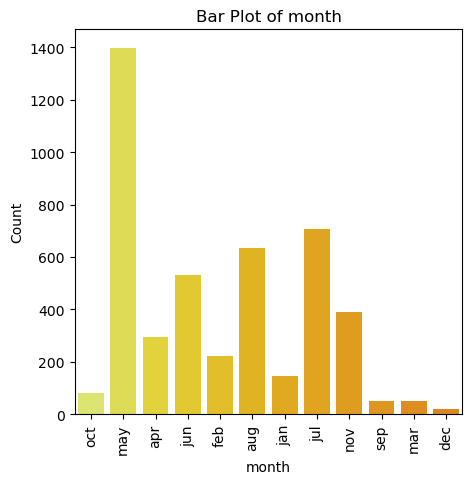

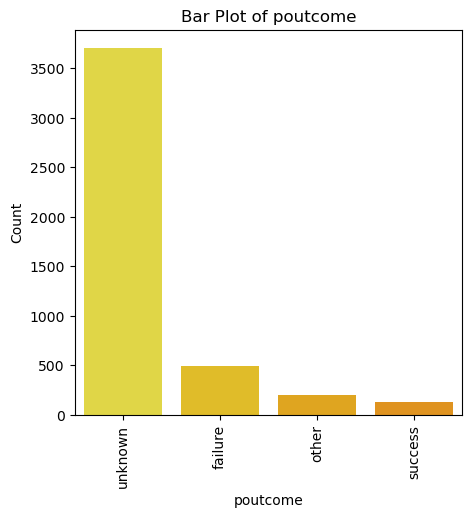

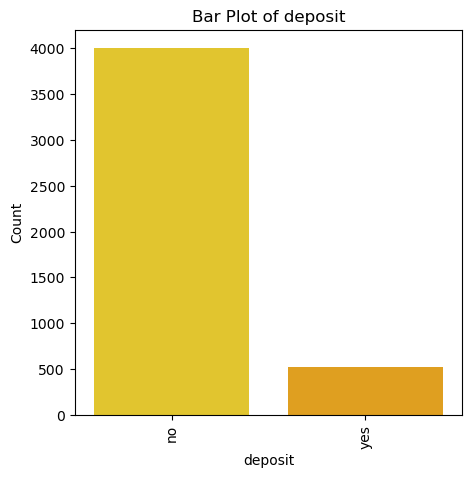

In [28]:
for feature in cat_cols:
    plt.figure(figsize=(5,5))  # Adjust the figure size as needed
    sns.countplot(x=feature, data=bank, palette='Wistia')
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

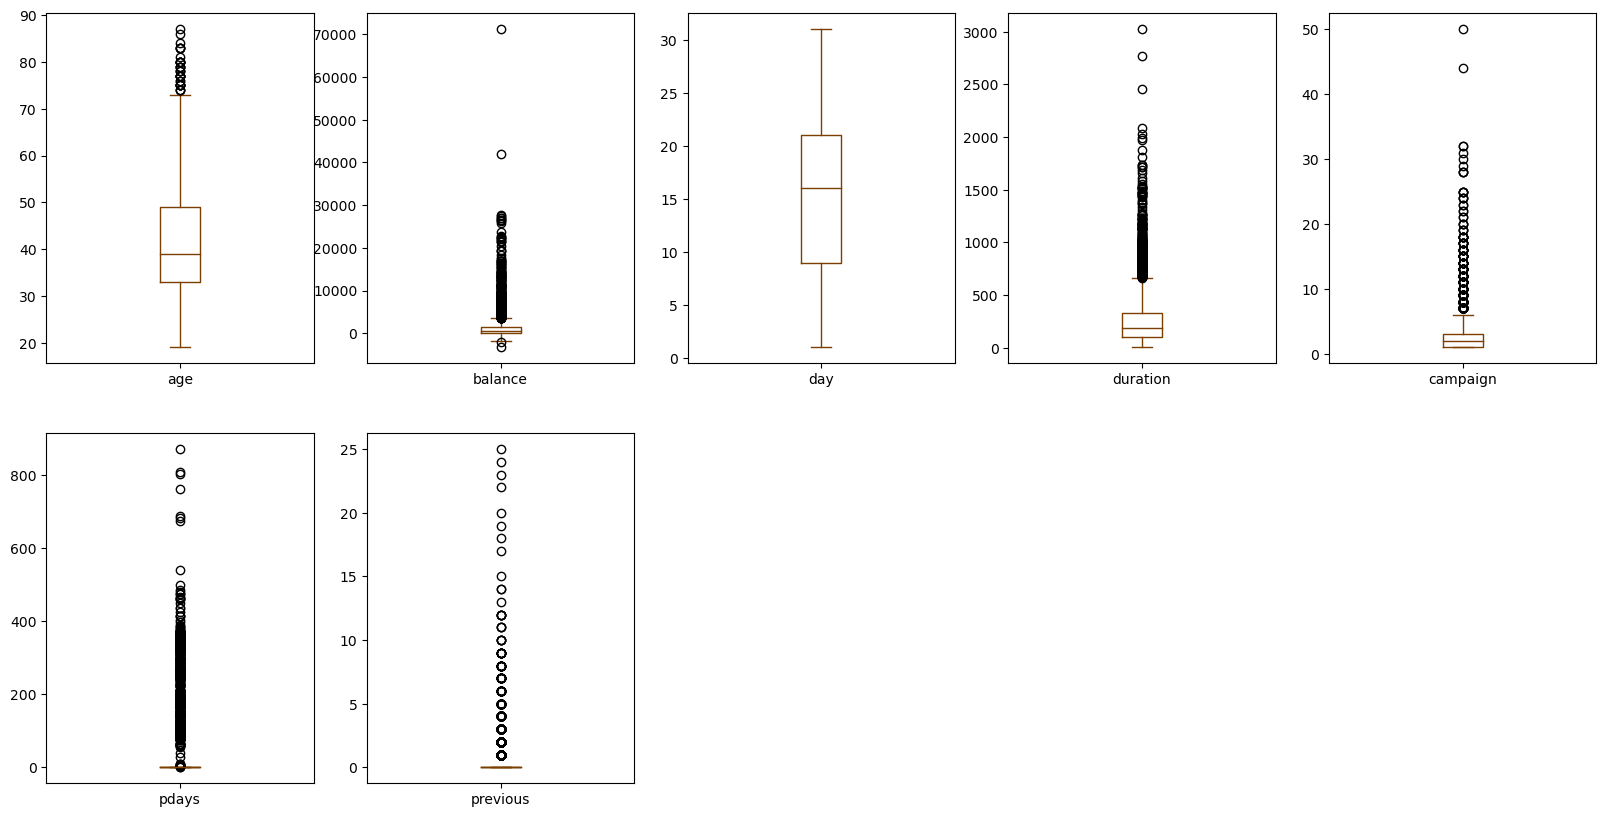

In [29]:
bank.plot(kind='box', subplots=True, layout=(2,5),figsize=(20,10),color='#7b3f00')
plt.show()

In [30]:
column = bank[['age','campaign','duration']]
q1 = np.percentile(column, 25)
q3 = np.percentile(column, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
bank[['age','campaign','duration']] = column[(column > lower_bound) & (column < upper_bound)]

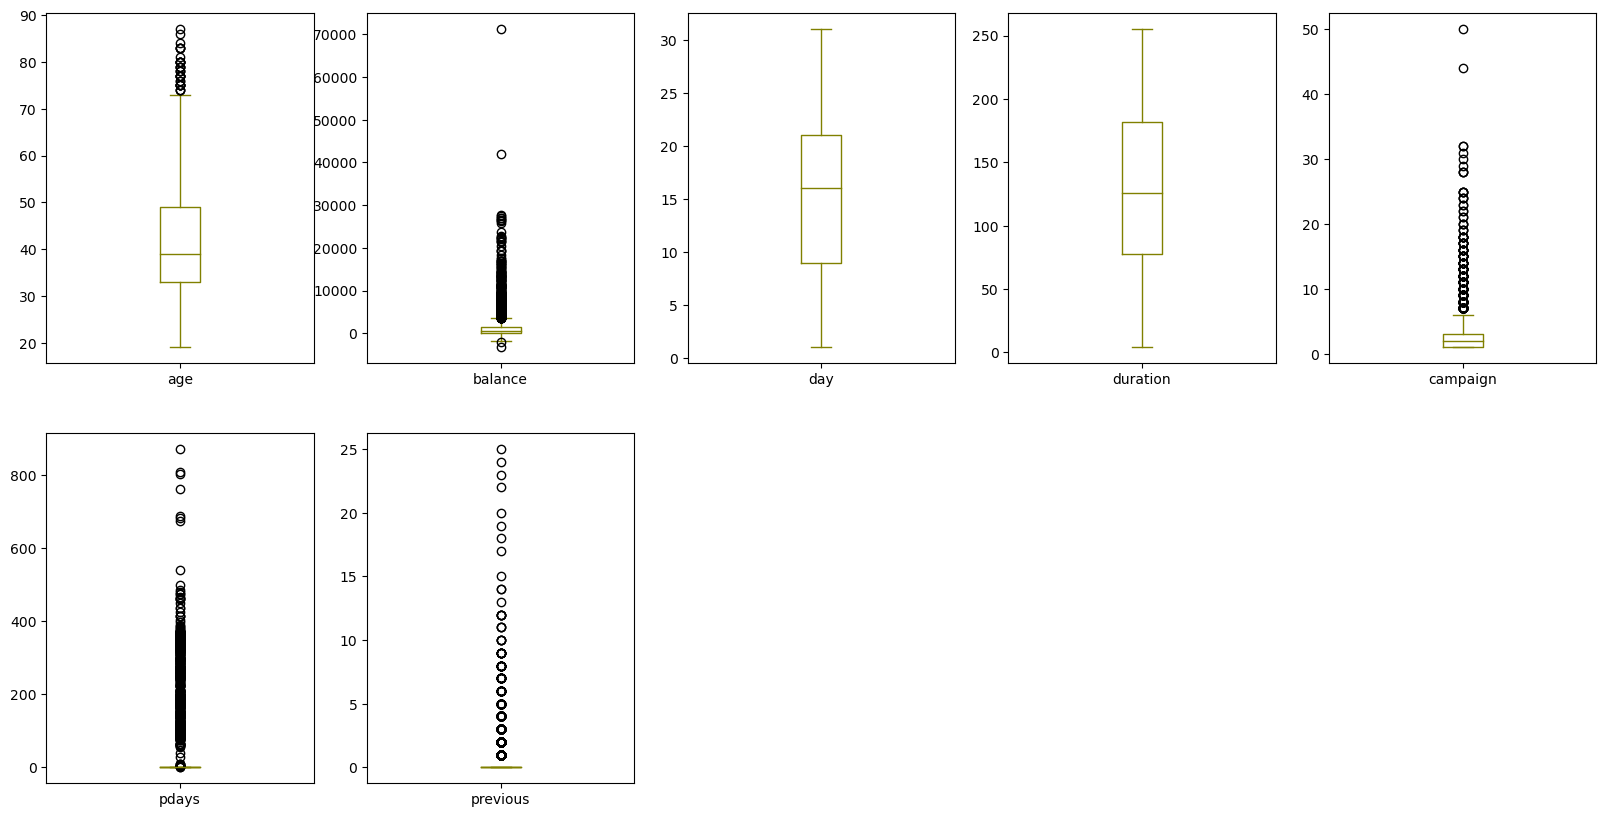

In [31]:
bank.plot(kind='box', subplots=True, layout=(2,5),figsize=(20,10),color='#808000')
plt.show()

In [42]:
# Drop duplicate columns if any
bank = bank.loc[:, ~bank.columns.duplicated()]

In [44]:
# Drop columns with no predictive value
columns_to_drop = ['day', 'month']
bank.drop(columns=columns_to_drop, inplace=True)

In [45]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,79.0,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,220.0,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,185.0,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,199.0,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,226.0,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,NaN,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,153.0,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,151.0,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,129.0,4,211,3,other,no


In [46]:
# Exclude non-numeric columns
numeric_cols = bank.select_dtypes(include=np.number).columns
bank_numeric = bank[numeric_cols]

# Calculate the correlation matrix
corr = bank_numeric.corr()

# Print the correlation matrix
print(corr)

# Filter the correlation matrix to show only values >= 0.90
corr_filtered = corr[abs(corr) >= 0.90]
print(corr_filtered)

               age   balance  duration  campaign     pdays  previous
age       1.000000  0.083820 -0.001661 -0.005148 -0.008894 -0.003511
balance   0.083820  1.000000  0.031894 -0.009976  0.009437  0.026196
duration -0.001661  0.031894  1.000000 -0.186101  0.024707  0.021747
campaign -0.005148 -0.009976 -0.186101  1.000000 -0.093137 -0.067833
pdays    -0.008894  0.009437  0.024707 -0.093137  1.000000  0.577562
previous -0.003511  0.026196  0.021747 -0.067833  0.577562  1.000000
          age  balance  duration  campaign  pdays  previous
age       1.0      NaN       NaN       NaN    NaN       NaN
balance   NaN      1.0       NaN       NaN    NaN       NaN
duration  NaN      NaN       1.0       NaN    NaN       NaN
campaign  NaN      NaN       NaN       1.0    NaN       NaN
pdays     NaN      NaN       NaN       NaN    1.0       NaN
previous  NaN      NaN       NaN       NaN    NaN       1.0


In [47]:
bank1 = bank.copy()
bank1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'deposit'],
      dtype='object')

In [48]:
bank1.shape

(4521, 15)

In [51]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
bank_encoded = bank1.apply(lb.fit_transform)
bank_encoded

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,deposit
0,11,10,1,0,0,1475,0,0,0,75,0,0,0,3,0
1,14,7,1,1,0,2030,1,1,0,216,0,228,4,0,0
2,16,4,2,2,0,1303,1,0,0,181,0,219,1,0,0
3,11,4,1,2,0,1352,1,1,2,195,3,0,0,3,0
4,40,1,1,1,0,274,1,0,2,222,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,14,7,1,1,0,119,1,0,0,252,4,0,0,3,0
4517,38,6,1,2,1,0,1,1,2,149,0,0,0,3,0
4518,38,9,1,1,0,558,0,0,0,147,10,0,0,3,0
4519,9,1,1,1,0,1187,0,0,0,125,3,140,3,1,0


In [52]:
bank_encoded['deposit'].value_counts()

deposit
0    4000
1     521
Name: count, dtype: int64

In [53]:
x = bank_encoded.drop('deposit',axis=1)  # independent variable
y = bank_encoded['deposit']              # dependent variable
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(4521, 14)
(4521,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [54]:
from sklearn.model_selection import train_test_split

print(4119*0.25)


1029.75


In [55]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3390, 14)
(1131, 14)
(3390,)
(1131,)


In [56]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

def eval_model(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))

def mscore(model):
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print('Training Score',train_score)  
    print('Testing Score',test_score)

In [57]:
from sklearn.tree import DecisionTreeClassifier

bank = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
bank.fit(x_train,y_train)



DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [59]:
mscore(bank)

Training Score 0.9056047197640118
Testing Score 0.8726790450928382


In [60]:
ypred_bank = bank.predict(x_test)
print(ypred_bank)

[0 0 0 ... 0 0 0]


In [61]:
eval_model(y_test,ypred_bank)

Accuracy_Score 0.8726790450928382
Confusion Matrix
 [[975  13]
 [131  12]]
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       988
           1       0.48      0.08      0.14       143

    accuracy                           0.87      1131
   macro avg       0.68      0.54      0.54      1131
weighted avg       0.83      0.87      0.83      1131



In [62]:
from sklearn.tree import plot_tree

In [63]:
cn = ['no','yes']
fn = x_train.columns
print(fn)
print(cn)


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome'],
      dtype='object')
['no', 'yes']


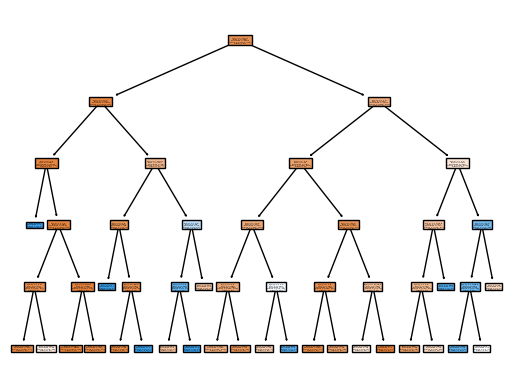

In [64]:
plot_tree(bank,class_names=cn,filled=True)
plt.show()

In [65]:
bank1 = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=15)
bank1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

In [66]:
mscore(bank1)

Training Score 0.8985250737463126
Testing Score 0.8726790450928382


In [68]:
ypred_bank1 = bank1.predict(x_test)

In [69]:
eval_model(y_test,ypred_bank1)

Accuracy_Score 0.8726790450928382
Confusion Matrix
 [[969  19]
 [125  18]]
Classification Report
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       988
           1       0.49      0.13      0.20       143

    accuracy                           0.87      1131
   macro avg       0.69      0.55      0.57      1131
weighted avg       0.84      0.87      0.84      1131



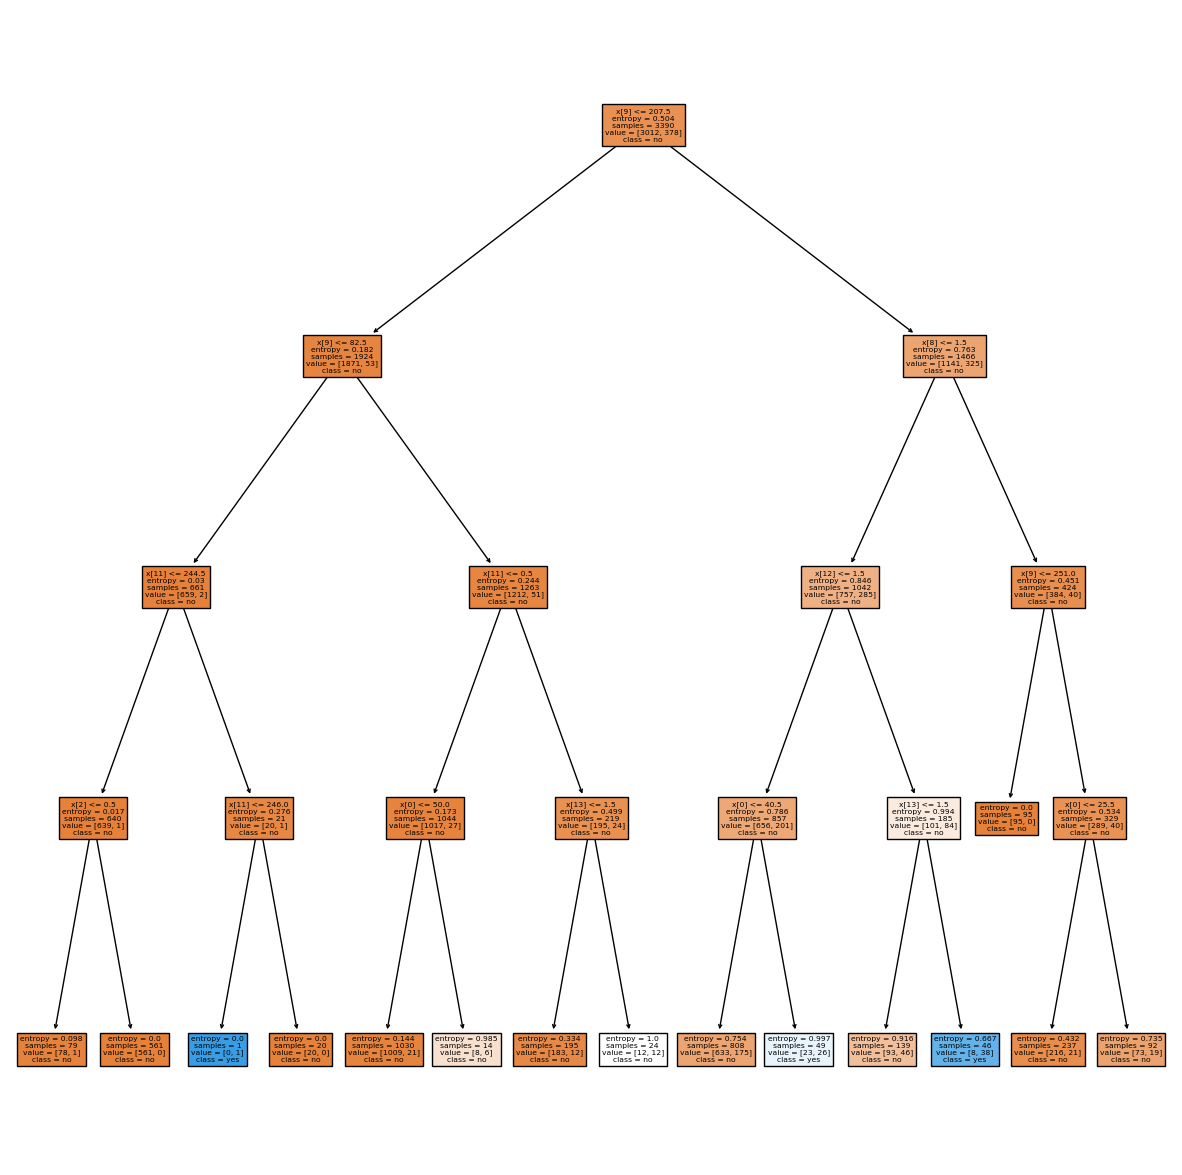

In [70]:
plt.figure(figsize=(15,15))
plot_tree(bank1,class_names=cn,filled=True)
plt.show()